In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/home/vipul/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vipul/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
train =  pd.read_csv('data/Train_SU63ISt.csv')
test = pd.read_csv('data/Test_0qrQsBZ.csv')

In [3]:
train_original = train.copy()
test_original = test.copy()

### Dataset Structure and Content

In [4]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [11]:
# Data types of each feature
print('Train Data types: \n', train.dtypes)
print('\nTest Data Types: \n', test.dtypes)

Train Data types: 
 ID           int64
Datetime    object
Count        int64
dtype: object

Test Data Types: 
 ID           int64
Datetime    object
dtype: object


In [9]:
# Shape of the dataset
print('Train Shape: ', train.shape)
print('Test Shape: ', test.shape)

Train Shape:  (18288, 3)
Test Shape:  (5112, 2)


### Feature Extraction

In [12]:
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')

train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format = '%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format = '%d-%m-%Y %H:%M')

In [13]:
for df in (train, test, train_original, test_original):
    df['year'] = df.Datetime.dt.year
    df['month'] = df.Datetime.dt.month
    df['day'] = df.Datetime.dt.day
    df['hour'] = df.Datetime.dt.hour

In [14]:
train['day_of_week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [16]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

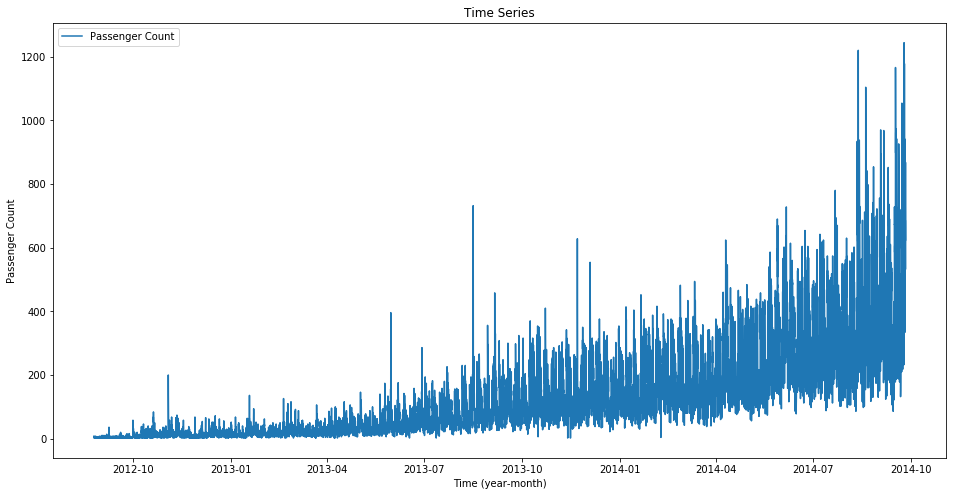

In [19]:
train.index = train['Datetime']
df = train.drop('ID', 1)
ts = df['Count']
plt.figure(figsize = (16, 8))
plt.plot(ts, label="Passenger Count")
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc = 'best')